## Table Detection and Information extraction

In [16]:
import os
import tensorflow as tf
import cv2 as cv
import matplotlib.pyplot as plt

### Load the trained model
The saved_model.pb file contains the weights of the object detection network trained on the given dataset. The weights are stored in a seperate folder 'saved_model'. We have used a pretrained SSD ResNet50 and fine-tuned it on the given dataset

In [2]:
detect_fn = tf.saved_model.load('saved_model')

In [3]:
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils

In [4]:
category_index = label_map_util.create_category_index_from_labelmap('label_map.pbtxt', use_display_name=True)

In [5]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [6]:
def load_image_into_numpy_array(path):
    return np.array(Image.open(path))

In [7]:
image_np = load_image_into_numpy_array('00015.jpg')

In [8]:
image_np.shape

(908, 1052, 3)

In [9]:
input_tensor = tf.convert_to_tensor(image_np)

In [10]:
input_tensor = input_tensor[tf.newaxis, ...]

### Compute the detections

In [11]:
detections = detect_fn(input_tensor)

In [12]:
num_detections = int(detections.pop('num_detections'))
detections = {key: value[0, :num_detections].numpy()
                   for key, value in detections.items()}
detections['num_detections'] = num_detections

In [13]:
detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

In [14]:
image_np_with_detections = image_np.copy()

### Visualize the bounding boxes

In [15]:
viz_utils.visualize_boxes_and_labels_on_image_array(
          image_np_with_detections,
          detections['detection_boxes'],
          detections['detection_classes'],
          detections['detection_scores'],
          category_index,
          use_normalized_coordinates=True,
          max_boxes_to_draw=200,
          min_score_thresh=.30,
          agnostic_mode=False)

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

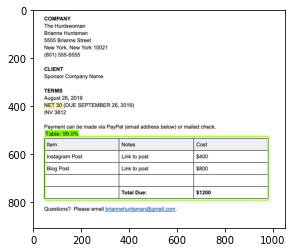

In [17]:
%matplotlib inline
plt.figure()
plt.imshow(image_np_with_detections)

In [18]:
cv.imwrite('detections.jpg',image_np_with_detections)

True

### Compute the coordinates of all the bounding boxes (xmin,ymin,xmax,ymax)

In [19]:
boxes=list()
height=image_np.shape[0]
width=image_np.shape[1]
threshold=0.3
for i in range(detections['detection_boxes'].shape[0]):
    box=detections['detection_boxes'][i]
    if detections['detection_scores'][i]>threshold:
        ymin=int(box[0]*height)
        xmin=int(box[1]*width)
        ymax=int(box[2]*height)
        xmax=int(box[3]*width)
        boxes.append([(xmin,ymin),(xmax,ymax)])

These steps are repeated for each predicted bounding box. In this case, there is only one

In [20]:
#For each bounding box
xmin=boxes[0][0][0]
ymin=boxes[0][0][1]
xmax=boxes[0][1][0]
ymax=boxes[0][1][1]
crop=image_np[ymin:ymin+(ymax-ymin),xmin:xmin+(xmax-xmin)]

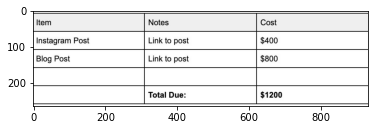

In [21]:
plt.imshow(crop)

In [22]:
cv.imwrite('crop.jpg',crop)

True

In the command line terminal, run the following command:

#### $ tesseract crop.jpg text.txt

We should be able to see a text file 'text.txt' containing the contents of the detected table!